In [2]:
spark

In [3]:
from pyspark.sql.functions import col, isnan, isnull, when, count, udf, split, size
import matplotlib.pyplot as plt

#### User

In [4]:
bucket = 'my-big-data-project-as/landing/'
filename = 'yelp_academic_dataset_user.json'
file_path = 'gs://' + bucket + filename

In [4]:
sdf = spark.read.json(file_path)

In [5]:
sdf.printSchema()

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)



In [6]:
sdf.describe()

DataFrame[summary: string, average_stars: string, compliment_cool: string, compliment_cute: string, compliment_funny: string, compliment_hot: string, compliment_list: string, compliment_more: string, compliment_note: string, compliment_photos: string, compliment_plain: string, compliment_profile: string, compliment_writer: string, cool: string, elite: string, fans: string, friends: string, funny: string, name: string, review_count: string, useful: string, user_id: string, yelping_since: string]

In [7]:
sdf.show(5)

+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+------+------------+------+--------------------+-------------------+
|average_stars|compliment_cool|compliment_cute|compliment_funny|compliment_hot|compliment_list|compliment_more|compliment_note|compliment_photos|compliment_plain|compliment_profile|compliment_writer| cool|               elite|fans|             friends|funny|  name|review_count|useful|             user_id|      yelping_since|
+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+------+------------+------+--------------------+-------------------+
|         3.91|    

In [8]:
sdf.count()

1987897

In [9]:
sdf.columns

['average_stars',
 'compliment_cool',
 'compliment_cute',
 'compliment_funny',
 'compliment_hot',
 'compliment_list',
 'compliment_more',
 'compliment_note',
 'compliment_photos',
 'compliment_plain',
 'compliment_profile',
 'compliment_writer',
 'cool',
 'elite',
 'fans',
 'friends',
 'funny',
 'name',
 'review_count',
 'useful',
 'user_id',
 'yelping_since']

In [10]:
sdf.select("average_stars", "review_count").summary("count", "min", "max", "mean").show()

+-------+------------------+------------------+
|summary|     average_stars|      review_count|
+-------+------------------+------------------+
|  count|           1987897|           1987897|
|    min|               1.0|                 0|
|    max|               5.0|             17473|
|   mean|3.6304941503508696|23.394409267683386|
+-------+------------------+------------------+



In [11]:
sdf.select("fans", "friends", "useful").summary("count", "min", "max", "mean").show()

+-------+------------------+--------------------+-----------------+
|summary|              fans|             friends|           useful|
+-------+------------------+--------------------+-----------------+
|  count|           1987897|             1987897|          1987897|
|    min|                 0|---2PmXbF47D870st...|                0|
|    max|             12497|zzzOOwSYzuTPvsafS...|           206296|
|   mean|1.4657404282012598|                null|42.29633527290398|
+-------+------------------+--------------------+-----------------+



In [12]:
sdf.summary().show()

+-------+------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+------------------+-----------------+------------------+-------------------+-----------------+------------------+-----------------+------------------+--------------------+------------------+------------+------------------+-----------------+--------------------+-------------------+
|summary|     average_stars|   compliment_cool|    compliment_cute|  compliment_funny|    compliment_hot|    compliment_list|    compliment_more|   compliment_note|compliment_photos|  compliment_plain| compliment_profile|compliment_writer|              cool|            elite|              fans|             friends|             funny|        name|      review_count|           useful|             user_id|      yelping_since|
+-------+------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+-

In [5]:
sdf.select([count(when(isnull(c), c)).alias(c) for c in ["average_stars", "review_count","user_id","friends"] ]).show()

+-------------+------------+-------+-------+
|average_stars|review_count|user_id|friends|
+-------------+------------+-------+-------+
|            0|           0|      0|      0|
+-------------+------------+-------+-------+



In [6]:
sdf_df = sdf.toPandas()

24/04/19 13:52:20 ERROR TaskSetManager: Total size of serialized results of 20 tasks (2.0 GiB) is bigger than spark.driver.maxResultSize (2.0 GiB)
24/04/19 13:52:20 WARN TaskSetManager: Lost task 15.0 in stage 4.0 (TID 68) (cluster-33a1-w-1.us-central1-a.c.exalted-breaker-415017.internal executor 4): TaskKilled (Tasks result size has exceeded maxResultSize)
24/04/19 13:52:20 ERROR TaskSetManager: Total size of serialized results of 21 tasks (2.1 GiB) is bigger than spark.driver.maxResultSize (2.0 GiB)
24/04/19 13:52:20 WARN TaskSetManager: Lost task 13.0 in stage 4.0 (TID 66) (cluster-33a1-w-0.us-central1-a.c.exalted-breaker-415017.internal executor 7): TaskKilled (Tasks result size has exceeded maxResultSize)
24/04/19 13:52:20 ERROR TaskSetManager: Total size of serialized results of 22 tasks (2.2 GiB) is bigger than spark.driver.maxResultSize (2.0 GiB)
24/04/19 13:52:20 WARN TaskSetManager: Lost task 23.0 in stage 4.0 (TID 76) (cluster-33a1-w-2.us-central1-a.c.exalted-breaker-415017.

Py4JJavaError: An error occurred while calling o84.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Total size of serialized results of 20 tasks (2.0 GiB) is bigger than spark.driver.maxResultSize (2.0 GiB)
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2717)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2653)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2652)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2652)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1189)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1189)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1189)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2913)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2855)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2844)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:959)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2293)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2314)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2333)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2358)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1021)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1020)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:424)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:3688)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:3858)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:512)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3856)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:109)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:169)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:95)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:779)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3856)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3685)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)


In [9]:
sdf_df.tail()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
1987892,4.92,0,0,0,0,0,0,0,0,0,...,0,,0,None,0,Jerrold,23,7,fB3jbHi3m0L2KgGOxBv6uw,2015-01-06 00:31:31
1987893,5.00,0,0,0,0,0,0,0,0,0,...,0,,0,None,0,Jane,1,0,68czcr4BxJyMQ9cJBm6C7Q,2016-06-14 07:20:52
1987894,2.00,0,0,0,0,0,0,0,0,0,...,0,,0,None,1,Shomari,4,1,1x3KMskYxOuJCjRz70xOqQ,2017-02-04 15:31:58
1987895,3.00,0,0,0,0,0,0,0,0,0,...,0,,0,None,0,Susanne,2,0,ulfGl4tdbrH05xKzh5lnog,2011-01-14 00:29:08
1987896,5.00,0,0,0,0,0,0,0,0,0,...,0,,0,None,0,Isa,2,0,wL5jPrLRVCK_Pmo4lM1zpA,2020-12-19 02:32:39


In [16]:
max_date = sdf_df['yelping_since'].max()
print("Newest date:", max_date)
min_date = sdf_df['yelping_since'].min()
print("Oldest date:", min_date)

Newest date: 2022-01-19 17:15:47
Oldest date: 2004-10-12 08:46:11


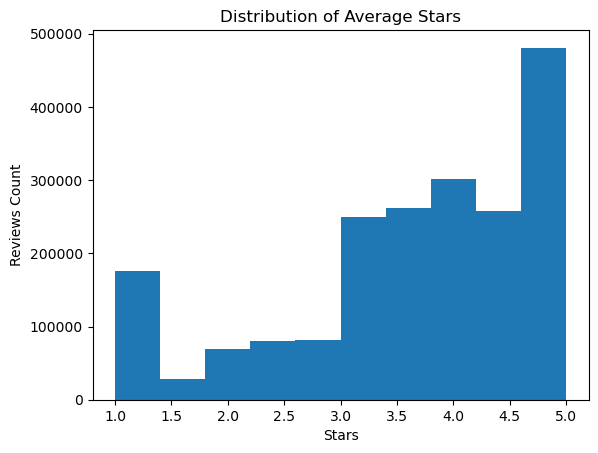

In [25]:
plt.hist(sdf_df['average_stars'], bins = 10)
plt.title("Distribution of Average Stars")
plt.xlabel("Stars")
plt.ylabel("Reviews Count")
plt.show()

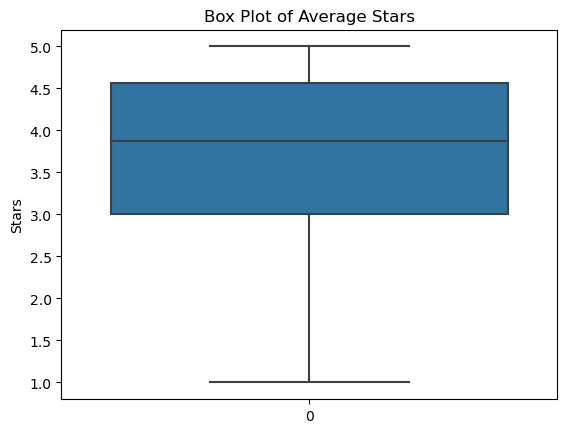

In [23]:
import seaborn as sns
sns.boxplot(sdf_df['average_stars'])
plt.ylabel('Stars')
plt.title('Box Plot of Average Stars')
plt.show()

                 useful  average_stars  review_count
useful         1.000000       0.010973      0.573369
average_stars  0.010973       1.000000      0.045380
review_count   0.573369       0.045380      1.000000


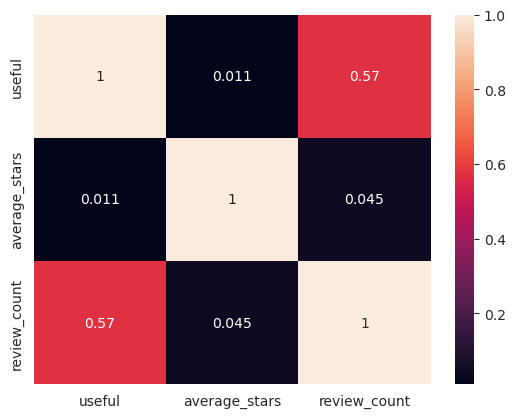

In [12]:

numeric_columns = [ "user_id", "useful", "average_stars", "review_count" ]
subset_df = sdf_df[ numeric_columns ]

# Print the correlation matrix
print(subset_df.corr())

# Plot the correlation heatmap
dataplot = sns.heatmap(subset_df.corr(), annot=True)

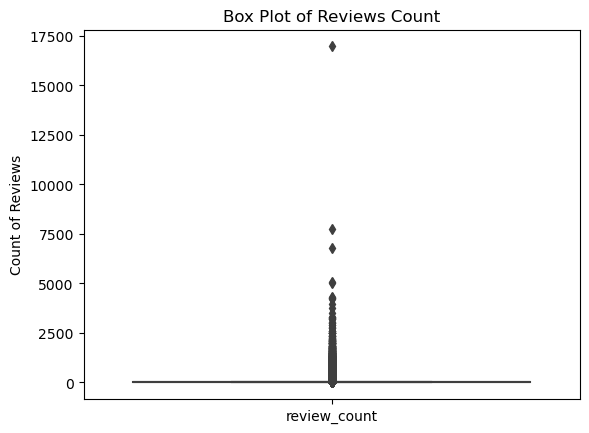

In [16]:
import seaborn as sns
review_count = sdf.select('review_count').sample(False, 0.2).toPandas()
sns.boxplot(review_count)
plt.ylabel('Count of Reviews')
plt.title('Box Plot of Reviews Count')
plt.show()


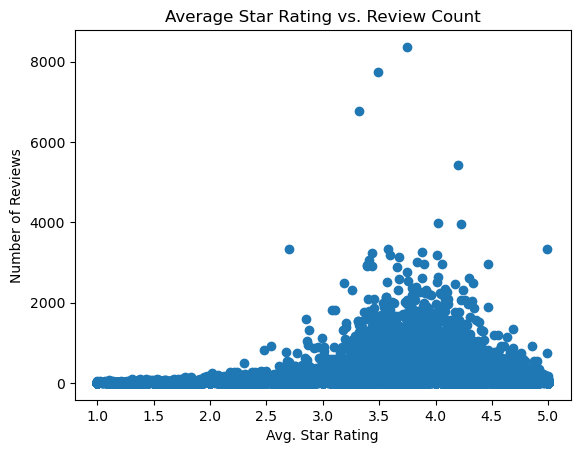

In [21]:
scatter_data = sdf.select('review_count', 'average_stars').sample(False, 0.2).toPandas()
plt.scatter(scatter_data['average_stars'], scatter_data['review_count'])
plt.title('Average Star Rating vs. Review Count')
plt.xlabel('Avg. Star Rating')
plt.ylabel('Number of Reviews')
plt.show()

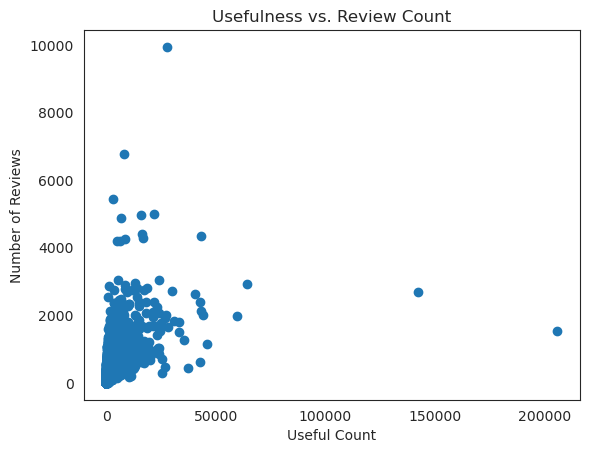

In [28]:
scatter_data2 = sdf.select('useful', 'review_count').sample(False, 0.2).toPandas()
plt.scatter( scatter_data2['useful'], scatter_data2['review_count'])
plt.title('Usefulness vs. Review Count')
plt.xlabel('Useful Count')
plt.ylabel('Number of Reviews')
plt.show()

#### Reviews

In [5]:
filename_review = 'yelp_academic_dataset_review.json'
file_path2 = 'gs://' + bucket + filename_review

In [6]:
sdf2 = spark.read.json(file_path2)

In [7]:
sdf2.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



In [32]:
sdf2.describe()

DataFrame[summary: string, business_id: string, cool: string, date: string, funny: string, review_id: string, stars: string, text: string, useful: string, user_id: string]

In [10]:
sdf2.show(5)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|
|YjUWPpI6HXG530lwP...|   0|2014-02-05 20:30:30|    0|saUsX_uimxRlCVr67...|  3.0|Family diner. Had...|     0|8g_iMtfSiwikVnbP2...|
|kxX2SOes4o-D3ZQBk...|   1|2015-01-04 00:01:03|    0|AqPFMleE6RsU23_au...|  5.0|Wow!  Yummy, diff...|     1|_7bHUi9Uuf5__HHc_...|
|e4Vwtrqf-wpJfwesg...|   1|2017-01-14 20:54:15|    0|Sx8TMOWLNuJBWer-0...|  4.0|Cute inter

In [11]:
sdf2.count()

6990280

In [45]:
sdf2.columns

['business_id',
 'cool',
 'date',
 'funny',
 'review_id',
 'stars',
 'text',
 'useful',
 'user_id',
 'Characters',
 'Words']

In [13]:
sdf2.select("stars", "cool","funny","useful").summary("count", "min", "max", "mean").show()

+-------+----------------+------------------+-------------------+------------------+
|summary|           stars|              cool|              funny|            useful|
+-------+----------------+------------------+-------------------+------------------+
|  count|         6990280|           6990280|            6990280|           6990280|
|    min|             1.0|                -1|                 -1|                -1|
|    max|             5.0|               404|                792|              1182|
|   mean|3.74858374771826|0.4986175088837643|0.32655959417934616|1.1846089140921394|
+-------+----------------+------------------+-------------------+------------------+



In [14]:
sdf2.summary().show()

+-------+--------------------+------------------+-------------------+-------------------+--------------------+------------------+----------------------+------------------+--------------------+
|summary|         business_id|              cool|               date|              funny|           review_id|             stars|                  text|            useful|             user_id|
+-------+--------------------+------------------+-------------------+-------------------+--------------------+------------------+----------------------+------------------+--------------------+
|  count|             6990280|           6990280|            6990280|            6990280|             6990280|           6990280|               6990280|           6990280|             6990280|
|   mean|                null|0.4986175088837643|               null|0.32655959417934616|                null|  3.74858374771826|                  null|1.1846089140921394|                null|
| stddev|                null| 2.17

In [29]:
sdf2.select([count(when(isnull(c), c)).alias(c) for c in ["business_id", "date","user_id","review_id","text","stars"] ]).show()

+-----------+----+-------+---------+----+-----+
|business_id|date|user_id|review_id|text|stars|
+-----------+----+-------+---------+----+-----+
|          0|   0|      0|        0|   0|    0|
+-----------+----+-------+---------+----+-----+



In [8]:
from pyspark.sql.functions import min, max
from pyspark.sql.types import IntegerType

In [9]:
oldest_date = sdf2.select(min("date")).first()[0]
print(f"Oldest Date:", oldest_date)

Oldest Date: 2005-02-16 03:23:22


In [17]:
newest_date = sdf2.select(max("date")).first()[0]
print(f"Newest Date:", newest_date)

Newest Date: 2022-01-19 19:48:45


In [10]:
sdf2.select("text").show()

+--------------------+
|                text|
+--------------------+
|If you decide to ...|
|I've taken a lot ...|
|Family diner. Had...|
|Wow!  Yummy, diff...|
|Cute interior and...|
|I am a long term ...|
|Loved this tour! ...|
|Amazingly amazing...|
|This easter inste...|
|Had a party of 6 ...|
|My experience wit...|
|Locals recommende...|
|Love going here f...|
|Good food--loved ...|
|The bun makes the...|
|Great place for b...|
|Tremendous servic...|
|The hubby and I h...|
|I go to blow bar ...|
|My absolute favor...|
+--------------------+
only showing top 20 rows



In [11]:
def characters(text_given):
    return len(text_given)

characters_udf = udf(characters, IntegerType())
sdf2 = sdf2.withColumn("Characters", characters_udf(sdf2.text))

In [12]:
sdf2.select("Characters").show()

+----------+
|Characters|
+----------+
|       513|
|       829|
|       339|
|       243|
|       534|
|       341|
|       804|
|       192|
|       526|
|       524|
|      1009|
|       119|
|       242|
|       175|
|       658|
|       175|
|       276|
|       577|
|       393|
|       419|
+----------+
only showing top 20 rows



In [13]:
def words(text_given):
    if text_given:
        return len(text_given.split())
words_udf = udf(words, IntegerType())
sdf2 = sdf2.withColumn("Words", words_udf(sdf2.text))
sdf2.select("Words").show()

+-----+
|Words|
+-----+
|  101|
|  151|
|   55|
|   40|
|   94|
|   65|
|  152|
|   27|
|  102|
|   97|
|  177|
|   19|
|   42|
|   31|
|  114|
|   29|
|   42|
|  108|
|   78|
|   81|
+-----+
only showing top 20 rows



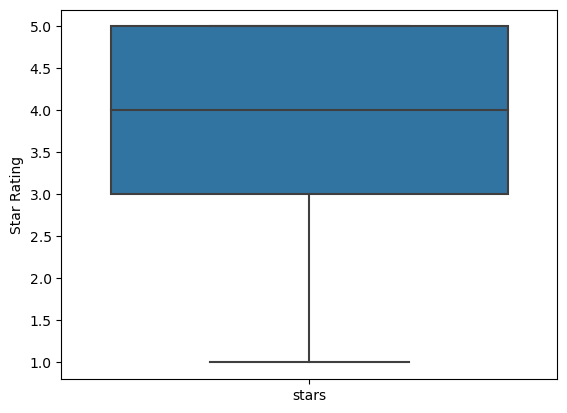

In [15]:
import seaborn as sns
stars_df = sdf2.select("stars").toPandas()
sns.boxplot(stars_df)
plt.ylabel('Star Rating')
plt.show()

           stars    useful     Words
stars   1.000000 -0.072458 -0.202355
useful -0.072458  1.000000  0.241396
Words  -0.202355  0.241396  1.000000


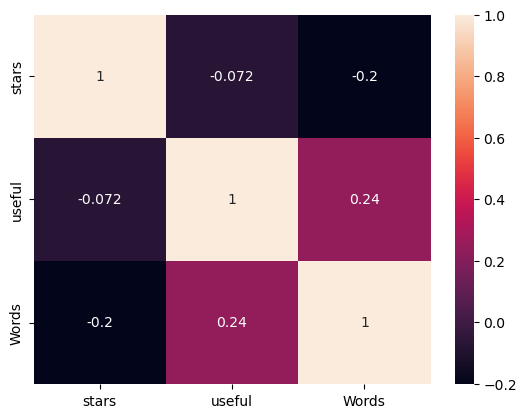

In [16]:
subset_df2 = sdf2.select("stars", "useful","Words").toPandas()
print(subset_df2.corr())
dataplot = sns.heatmap(subset_df2.corr(), annot=True)

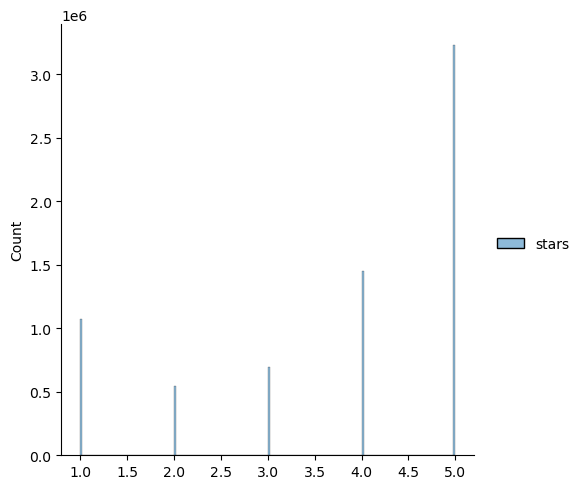

In [17]:
stars = sdf2.select("stars").toPandas()
dp = sns.displot(stars)

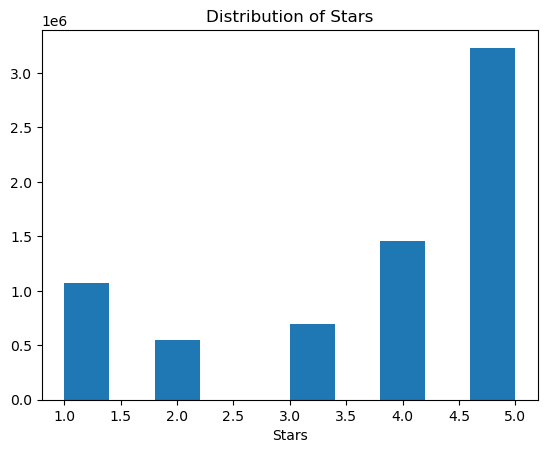

In [18]:
plt.hist(stars, bins = 10)
plt.title("Distribution of Stars")
plt.xlabel("Stars")
plt.show()